## What is XGBoost?
XGBoost stands for Extreme Gradient Boosting.
It is a machine learning algorithm that builds decision trees sequentially and combines them to make strong predictions.

## How XGBoost Works
XGBoost is based on Gradient Boosting, but with several optimizations:
#### Step 1: Boosting Concept
- Start with a weak learner (a small decision tree).

- Each new tree is built to fix the errors (residuals) made by the previous trees.

- Predictions are gradually improved.

#### Step 2: Gradient Boosting Core Idea
Instead of just looking at wrong predictions (like AdaBoost), Gradient Boosting minimizes a loss function (error measure) using gradient descent.
Example: If predicting house prices, the loss could be Mean Squared Error (MSE).

#### Step 3: XGBoost’s Improvements over Gradient Boosting
- Regularization → Prevents overfitting by adding penalties on complex trees.

- Parallelization → Builds trees faster by using multiple CPU cores.

- Handling Missing Values → Learns the best way to handle missing data.

- Tree Pruning → Instead of growing trees level-by-level, it grows them leaf-wise (more flexible, often higher accuracy).

- Sparsity-aware → Efficient with sparse (lots of zeros) data like TF-IDF in NLP.

- Cache & Memory optimization → Runs very fast, especially on large datasets.

### What is Regularization?
Regularization is like a penalty added to the model to stop it from becoming too complex.

- A tree with too many splits (too deep, too many branches) can memorize training data → overfitting.

- Regularization keeps the model simpler and more generalizable.

#### L1 vs L2 Regularization
##### L1 Regularization (Lasso)
- Definition: Adds the absolute value of weights as a penalty
- Effect:

    - Forces some weights to become exactly 0 → removes unimportant features (feature selection).

    - Leads to a sparse model.

- Think of it as: "Keep only the strongest signals, ignore the rest."

##### L2 Regularization (Ridge)

- Definition: Adds the squared value of weights as a penalty
- Effect:

    - Shrinks large weights closer to zero but not exactly zero.

    - Distributes importance across features smoothly.

- Think of it as: "Keep everything, but don’t let any one feature dominate too much."

L1 (Lasso) is like a speed breaker: it can completely stop some unnecessary wheels (features).

L2 (Ridge) is like friction: it slows everything down a bit but keeps all wheels moving.

Both L1 and L2 penalties are used to control the complexity of trees.

This is why XGBoost models are often more robust and generalize better than plain Gradient Boosting.

Example XGBoost parameters:

```python
model = xgb.XGBClassifier(
    reg_alpha=0.5,   # L1 penalty
    reg_lambda=1.0   # L2 penalty
)
```


In [1]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.9 MB/s eta 0:00:31
    --------------------------------------- 1.0/56.8 MB 2.2 MB/s eta 0:00:26
   - -------------------------------------- 1.8/56.8 MB 2.7 MB/s eta 0:00:21
   - -------------------------------------- 2.6/56.8 MB 3.0 MB/s eta 0:00:18
   -- ------------------------------------- 3.7/56.8 MB 3.4 MB/s eta 0:00:16
   --- ------------------------------------ 4.7/56.8 MB 3.7 MB/s eta 0:00:15
   ---- ----------------------------------- 6.3/56.8 MB 4.2 MB/s eta 0:00:13
   ----- ---------------------------------- 7.6/56.8 MB 4.5 MB/s eta 0:00:11
   ------ --------------------------------- 9.4/56.8 MB 5.0 MB/s eta 0:00:10
   -------- ------------------------------- 11.8/56.8 MB 5.6 MB/s eta 0:00:09
   ---------- ----------------------------- 14.7/56.8 MB 6.3 MB/s eta 0:00:07
   --------

In [2]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
# Dataset
data = {
    "House Size": [500, 800, 1000, 1500, 1800, 2000, 2500, 3000, 3500, 4000],
    "Price": [2000000, 3000000, 4000000, 6000000, 7200000, 8000000, 10000000, 12000000, 14000000, 16000000]
}

df = pd.DataFrame(data)

In [4]:
X = df[["House Size"]] #feature
y = df["Price"] #target

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# ✅ Model with L1 (Lasso) Regularization
model_l1 = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    reg_alpha=10,    # L1 penalty
    reg_lambda=0,    # no L2
    random_state=42
)

In [7]:
model_l1.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [8]:
y_pred_l1 = model_l1.predict(X_test)
print("L1 Regularization MSE:", mean_squared_error(y_test, y_pred_l1))

L1 Regularization MSE: 2500064182272.0


In [9]:
# ✅ Model with L2 (Ridge) Regularization
model_l2 = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    reg_alpha=0,     # no L1
    reg_lambda=10,   # L2 penalty
    random_state=42
)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print("L2 Regularization MSE:", mean_squared_error(y_test, y_pred_l2))

L2 Regularization MSE: 2647607214080.0


In [ ]:
# ✅ Model with No Regularization (baseline)
model_none = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.5,
    max_depth=3,
    reg_alpha=0,
    reg_lambda=0,
    random_state=42
)
model_none.fit(X_train, y_train)
y_pred_none = model_none.predict(X_test)
print("No Regularization MSE:", mean_squared_error(y_test, y_pred_none))

No Regularization MSE: 2499999956992.0


##### What this shows

No Regularization → model tries to fit as close as possible (risk of overfitting if dataset was bigger).

L1 (reg_alpha) → will force some splits to shrink, sometimes underfitting, but can simplify model.

L2 (reg_lambda) → smooths weights, reduces extreme predictions, better for generalization.

In [14]:
# Predictions on full dataset for visualization
X_plot = pd.DataFrame({"House Size": range(500, 4200, 100)})
pred_none = model_none.predict(X_plot)
pred_l1 = model_l1.predict(X_plot)
pred_l2 = model_l2.predict(X_plot)

In [20]:
pred_none, pred_l1, pred_l2

(array([2.0e+06, 2.0e+06, 2.0e+06, 2.0e+06, 2.0e+06, 4.0e+06, 4.0e+06,
        4.0e+06, 4.0e+06, 4.0e+06, 6.0e+06, 6.0e+06, 6.0e+06, 7.2e+06,
        7.2e+06, 8.0e+06, 8.0e+06, 8.0e+06, 8.0e+06, 8.0e+06, 1.0e+07,
        1.0e+07, 1.0e+07, 1.0e+07, 1.0e+07, 1.2e+07, 1.2e+07, 1.2e+07,
        1.2e+07, 1.2e+07, 1.2e+07, 1.2e+07, 1.2e+07, 1.2e+07, 1.2e+07,
        1.6e+07, 1.6e+07], dtype=float32),
 array([2.0001919e+06, 2.0001919e+06, 2.0001919e+06, 2.0001919e+06,
        2.0001919e+06, 4.0001175e+06, 4.0001175e+06, 4.0001175e+06,
        4.0001175e+06, 4.0001175e+06, 6.0000865e+06, 6.0000865e+06,
        6.0000865e+06, 7.2000415e+06, 7.2000415e+06, 7.9999770e+06,
        7.9999770e+06, 7.9999770e+06, 7.9999770e+06, 7.9999770e+06,
        9.9999280e+06, 9.9999280e+06, 9.9999280e+06, 9.9999280e+06,
        9.9999280e+06, 1.1999872e+07, 1.1999872e+07, 1.1999872e+07,
        1.1999872e+07, 1.1999872e+07, 1.1999872e+07, 1.1999872e+07,
        1.1999872e+07, 1.1999872e+07, 1.1999872e+07, 1.599

In [23]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 3.5 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 3.6 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 3.5 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 3.6 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 3.5 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 3.7 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 3.7 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 3.6 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 3.7 MB/s eta 0:00:01
   --------------------------------------

In [26]:
import matplotlib.pyplot as plt

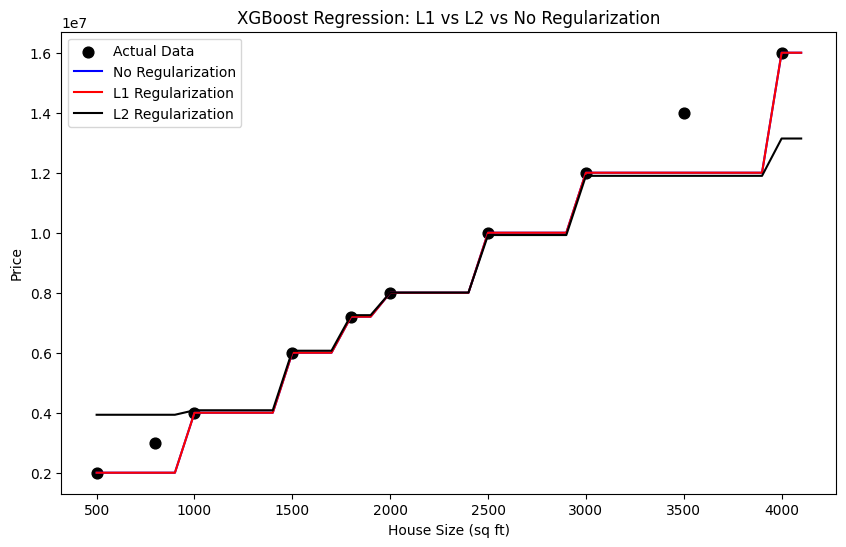

In [29]:
# Plot
plt.figure(figsize=(10,6))
plt.scatter(X, y, color="black", label="Actual Data", s=60)
plt.plot(X_plot, pred_none, label="No Regularization", color="blue")
plt.plot(X_plot, pred_l1, label="L1 Regularization", color="red")
plt.plot(X_plot, pred_l2, label="L2 Regularization", color="black")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price")
plt.title("XGBoost Regression: L1 vs L2 vs No Regularization")
plt.legend()
plt.show()